In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

# Add the 'scripts' directory to the Python path for custom imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Set display options to view more rows/columns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging (Assuming SetupLogger is implemented in scripts/logger.py)
from logger import SetupLogger
from load_data import LoadData  # Assuming load_data.py contains a LoadData class


ModuleNotFoundError: No module named 'logger'

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.linear_model import LogisticRegression
import numpy as np

# Initialize LabelEncoder for 'sex' column
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])  # Female = 0, Male = 1

# Apply FeatureHasher for 'device_id'
hasher = FeatureHasher(n_features=10, input_type='string')

# Transform 'device_id' column correctly
hashed_features = hasher.transform(data['device_id'].astype(str).apply(lambda x: [x])).toarray()

# Combine hashed features with the rest of the DataFrame
hashed_df = data.drop('device_id', axis=1)  # Drop original 'device_id'
X = np.hstack([hashed_features, hashed_df.drop('class', axis=1).values])  # Combine

# Target variable
y = data['class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Model training and predictions complete!")


Model training and predictions complete!


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.91
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
ROC-AUC: 0.50


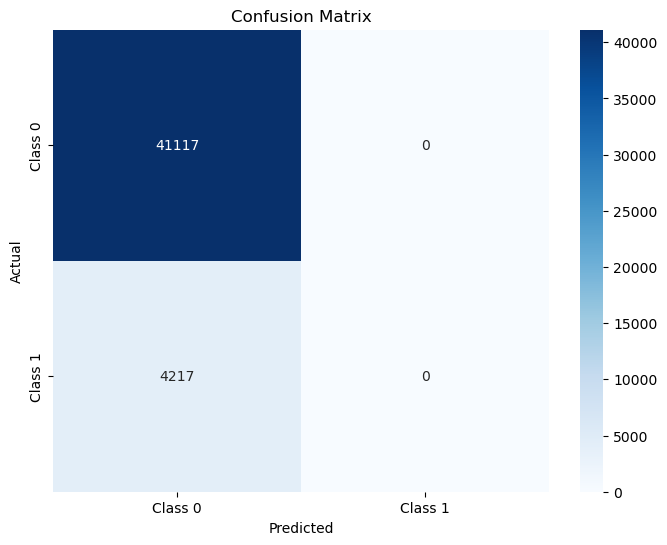

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [10]:
pip install scikit-learn mlflow pandas


Note: you may need to restart the kernel to use updated packages.


In [11]:
mlflow ui

SyntaxError: invalid syntax (3574192917.py, line 1)

In [12]:
!pip install mlflow


In [13]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Start MLflow experiment
mlflow.set_experiment("Credit Card Fraud Detection")

with mlflow.start_run():
    # Train a model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions and calculate accuracy
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    # Log model, parameters, and metrics
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("random_state", 42)
    mlflow.log_metric("accuracy", accuracy)

    # Log the model
    mlflow.sklearn.log_model(model, "random_forest_model")

print("Experiment logged successfully!")


2024/10/22 15:55:52 INFO mlflow.tracking.fluent: Experiment with name 'Credit Card Fraud Detection' does not exist. Creating a new experiment.
2024/10/22 15:57:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Experiment logged successfully!


In [14]:
mlflow ui


SyntaxError: invalid syntax (2385425841.py, line 1)